In [106]:
%matplotlib inline

In [102]:
import numpy as np
from matplotlib import pyplot as plt

In [89]:
EPS = 1e-10
ALPHA = 0.01;
BETA = 0.5
GRAD_TOL = 1e-3

In [9]:
n = 100;  # num. variables
m = 200;  # num. constraints
np.random.seed(1);
A = np.random.randn(m, n);

In [73]:
def f(x):
    p1 = - np.log(1 - A@x).sum()
    p2 = - np.log(1 - np.power(x, 2)).sum()
    return p1+p2

def grad_at_i(x, i):
    new_x = x.copy()
    new_x[i] += EPS
    return (f(new_x) - f(x)) / EPS

def grad(x):
    p1 = (np.diag(1/(1 - A@x).flatten()) @ A).sum(axis=0)
    p2 = 2 * x / (1 - np.power(x, 2))
    return p1[:,None] + p2

In [74]:
x0 = np.zeros(n)[:,None]

In [75]:
assert np.isclose(f(x0), 0)

In [76]:
bf_grads = np.array([grad_at_i(x0, i) for i in range(n)])
assert np.isclose(grad(x0).flatten(), bf_grads, atol=1e05).all()

In [86]:
(A @ (x+t*delta_x)).max()

177.25894328662565

In [94]:
f_at_x

-0.0

In [115]:
x = x0.copy()
fx_log = []
grad_log = []
t_log = []

while True:
    f_at_x = (f(x))
    # print('f(x)', f_at_x)
    grad_at_x = grad(x)
    delta_x = - grad_at_x
    
    grad_l1_norm = np.abs(grad_at_x).max()
    # print('l1(grad)', grad_l1_norm)
    if grad_l1_norm < GRAD_TOL:
        break
    fx_log.append(f_at_x)
    grad_log.append(grad_l1_norm)
    # find t
    t = 1
    # make sure x is feasible
    while ((A @ (x+t*delta_x)).max() > 1) or ((np.power(x+t*delta_x, 2)).max() > 1):
        t *= BETA        

    # ling search
    while f(x + t*delta_x) > (f_at_x + ALPHA*t*(grad_at_x.transpose() @ delta_x)[0,0]):
        t *= BETA

    t_log.append(t)
    x += (t * delta_x)

Text(0.5, 1.0, 't')

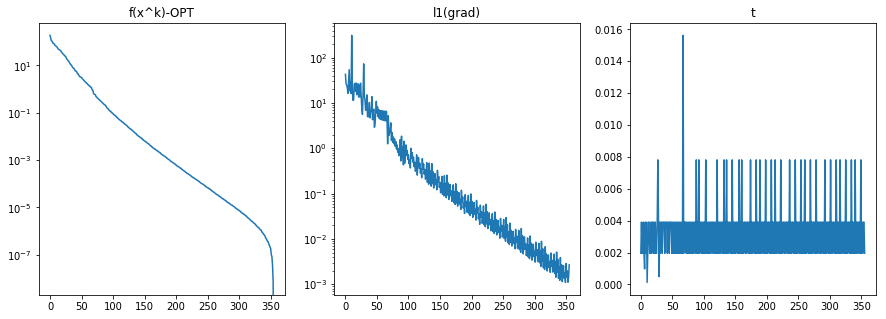

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fx_log = np.array(fx_log)
grad_log = np.array(grad_log)
t_log = np.array(t_log)

axes[0].semilogy(fx_log - np.min(fx_log))
axes[0].set_title('f(x^k)-OPT')
axes[1].semilogy(grad_log)
axes[1].set_title('l1(grad)')
axes[2].plot(t_log)
axes[2].set_title('t')